<a href="https://colab.research.google.com/github/felixmacaspac/enyu/blob/master/CCMACLRL_COMPARATIVE_ANALYSIS_FILIPINO_HOUSEHOLDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Machine Learning Models for Income Class Prediction of Filipino Households**

### Data Preparation

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("household_summary_data.CSV", on_bad_lines='skip')

<ipython-input-2-54d225f730f1>:1: DtypeWarning: Columns (69,73,74,75,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("household_summary_data.CSV", on_bad_lines='skip')


In [ ]:
df2 = pd.read_csv("household_member_data.CSV", on_bad_lines='skip', encoding='utf-8', encoding_errors='replace')

In [ ]:
df1.head()

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,S150117_REF_QTY,S150118_WASH_QTY,S150119_AIRCON_QTY,S150120_CAR_QTY,S150121_LANDLINE_QTY,S150122_CELL_QTY,S150123_COMP_QTY,S150124_OVEN_QTY,S150125_BANCA_QTY,S150126_MOTOR_QTY
0,1,28,1,6.5,290000,0,290000,0,0,340000,...,01,01,01,02,00,05,03,01,00,00
1,1,28,2,4.0,80000,72000,152000,20500,60000,32500,...,01,01,00,00,00,04,00,00,00,01
2,1,28,3,1.0,0,0,0,0,30000,81000,...,01,01,00,00,00,01,00,01,00,00
3,1,28,4,3.0,0,0,0,8700,170000,0,...,01,01,00,00,00,02,00,01,00,01
4,1,28,5,4.0,12000,80400,92400,250,30000,0,...,01,01,00,00,00,02,00,00,00,01


In [ ]:
df2.head()

,W_REGN,W_PROV,SEQUENCE_NO,LC101_LNO,LC03_REL,LC04_SEX,LC05_AGE,LC05A_5OVER,LC06_MSTAT,LC07_HGC_LEVEL,...,LC36_AVAIL,LC37_WILLING,LC38_PREVJOB,LC39_YEAR,LC39_MONTH,LC41_POCC,LC42INDUSTRY,LC43_QKB,NEWEMPSTAT,PWGTPRV
0,1,28,1,1,1,1,37,,2,6,...,,,,,,,...,,1,105.6973
1,1,28,1,2,2,2,46,,2,6,...,,,2,,,,...,,3,99.9517
2,1,28,1,3,3,1,16,,1,2,...,,,2,,,,...,,3,93.1776
3,1,28,1,4,3,2,9,,1,1,...,,,,,,,...,,,112.9560
4,1,28,1,5,3,1,8,,1,1,...,,,,,,,...,,,121.5757


As you can see with the data, there is a lot of columns or features that can be used. For now, the proponents will choose the columns that they believe are impactful to the identification of the family's income class.

In [ ]:
df1 = df1[["SEQUENCE_NO", "W_REGN", "W_PROV","FSIZE", "TOINC", "FOOD", "TOTEX", "URB", "RPROV", "RPSU", "PCINC"]]

In [ ]:
df1.head()

,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,PCINC
0,1,1,28,6.5,699940,180505,350404,2,2800,217,107683.08
1,2,1,28,4.0,324810,110240,231900,2,2800,217,81202.50
2,3,1,28,1.0,190061,53431,147510,2,2800,217,190061.00
3,4,1,28,3.0,213705,76295,153456,2,2800,217,71235.00
4,5,1,28,4.0,272290,89148,229692,2,2800,217,68072.50


In [ ]:
df2 = df2[["SEQUENCE_NO", "LC05_AGE", "LC07_HGC_LEVEL", "LC11_WORK", "LC14_PROCC", "C14_2DGT", "LC16_PKB", "C16_2DGT", "LC18_PNWHRS"]]

In [ ]:
df2.head()

,SEQUENCE_NO,LC05_AGE,LC07_HGC_LEVEL,LC11_WORK,LC14_PROCC,C14_2DGT,LC16_PKB,C16_2DGT,LC18_PNWHRS
0,1,37,6,1,0210,02,8422,84,08
1,1,46,6,2,,,,,
2,1,16,2,2,,,,,
3,1,9,1,2,,,,,
4,1,8,1,2,,,,,


In [ ]:
df1.describe()

,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,PCINC
count,164937.000000,164937.000000,164937.000000,164937.000000,1.649370e+05,1.649370e+05,1.649370e+05,164937.000000,164937.000000,164937.000000,1.649370e+05
mean,82521.277997,9.273844,45.657839,4.244342,2.960519e+05,9.360090e+04,2.180179e+05,1.519992,4568.234817,386.188987,8.186118e+04
std,47641.403943,4.701641,24.887890,2.029229,3.318637e+05,5.674610e+04,1.895825e+05,0.499602,2488.872164,448.896393,1.010255e+05
min,1.000000,1.000000,1.000000,1.000000,1.037400e+04,2.939000e+03,8.794000e+03,1.000000,100.000000,1.000000,5.408625e+03
25%,41259.000000,5.000000,24.000000,3.000000,1.386860e+05,5.678400e+04,1.114050e+05,1.000000,2402.000000,102.000000,3.540667e+04
50%,82531.000000,10.000000,45.000000,4.000000,2.102210e+05,8.072400e+04,1.674000e+05,2.000000,4501.000000,239.000000,5.544000e+04
75%,123776.000000,13.000000,70.000000,5.500000,3.422120e+05,1.150110e+05,2.621590e+05,2.000000,7000.000000,478.000000,9.401143e+04
max,165029.000000,17.000000,98.000000,23.000000,1.683868e+07,1.984454e+06,7.641695e+06,2.000000,9804.000000,3086.000000,9.691285e+06


In [ ]:
df2.describe()

,SEQUENCE_NO,LC05_AGE
count,716022.000000,716022.000000
mean,82979.295814,30.544039
std,47679.853821,20.718241
min,1.000000,0.000000
25%,41384.000000,13.000000
50%,82525.000000,26.000000
75%,124831.750000,46.000000
max,165029.000000,99.000000


In [ ]:
df1.isnull().sum()

,0
SEQUENCE_NO,0
W_REGN,0
W_PROV,0
FSIZE,0
TOINC,0
FOOD,0
TOTEX,0
URB,0
RPROV,0
RPSU,0


In [ ]:
df2.isnull().sum()

,0
SEQUENCE_NO,0
LC05_AGE,0
LC07_HGC_LEVEL,0
LC11_WORK,0
LC14_PROCC,0
C14_2DGT,0
LC16_PKB,0
C16_2DGT,0
LC18_PNWHRS,0


In [ ]:
df1.dtypes

,0
SEQUENCE_NO,int64
W_REGN,int64
W_PROV,int64
FSIZE,float64
TOINC,int64
FOOD,int64
TOTEX,int64
URB,int64
RPROV,int64
RPSU,int64


In [ ]:
df2.dtypes

,0
SEQUENCE_NO,int64
LC05_AGE,int64
LC07_HGC_LEVEL,object
LC11_WORK,object
LC14_PROCC,object
C14_2DGT,object
LC16_PKB,object
C16_2DGT,object
LC18_PNWHRS,object


### Data Cleaning

The proponents have noticed that some columns are an object data type which should be a numerical data type. The reason for this was some data points have an empty string which converts the entire column as an object data type. To convert this into numerical, firstly we need to substitute the empty strings into a 0 or any number that signifies no value or false value. Then, we can proceed into converting the entire column into a numerical data type.

In [ ]:
df2["LC07_HGC_LEVEL"] = df2["LC07_HGC_LEVEL"].replace(" ", "0")
df2["LC07_HGC_LEVEL"] = df2["LC07_HGC_LEVEL"].astype(int)
df2["LC07_HGC_LEVEL"]

,LC07_HGC_LEVEL
0,6
1,6
2,2
3,1
4,1
...,...
716017,2
716018,1
716019,2
716020,2


In [ ]:
df2["LC11_WORK"] = df2["LC11_WORK"].replace(" ", "2")
df2["LC11_WORK"] = df2["LC11_WORK"].astype(int)
df2["LC11_WORK"]

,LC11_WORK
0,1
1,2
2,2
3,2
4,2
...,...
716017,2
716018,2
716019,1
716020,1


In [ ]:
df2["LC14_PROCC"] = df2["LC14_PROCC"].replace("    ", "0")
df2["LC14_PROCC"] = df2["LC14_PROCC"].astype(int)
df2["LC14_PROCC"]

,LC14_PROCC
0,210
1,0
2,0
3,0
4,0
...,...
716017,0
716018,0
716019,5211
716020,9211


In [ ]:
df2["LC16_PKB"] = df2["LC16_PKB"].replace("    ", "0")
df2["LC16_PKB"] = df2["LC16_PKB"].astype(int)
df2["LC16_PKB"]

,LC16_PKB
0,8422
1,0
2,0
3,0
4,0
...,...
716017,0
716018,0
716019,4774
716020,112


In [ ]:
df2["C16_2DGT"] = df2["C16_2DGT"].replace("  ", "0")
df2["C16_2DGT"] = df2["C16_2DGT"].astype(int)
df2["C16_2DGT"].unique()

array([84,  0, 25,  1, 47, 41, 80, 96, 33, 85, 49, 10, 86, 56, 52, 94, 64,
       14, 43, 45, 82, 90, 61, 71, 42, 16, 28,  3,  2, 62, 95, 87, 69, 81,
       46, 65, 68, 55, 79, 92,  8, 35, 11, 31, 32, 93, 27, 23, 18, 66, 53,
       51, 78, 63, 29, 13, 88, 73, 60, 77, 70, 74, 36, 30, 24,  7, 38,  9,
       20, 12, 22, 72, 26, 21, 50, 91, 15, 39, 58, 17, 59, 75, 37, 19, 99,
        6,  5])

In [ ]:
df2["LC18_PNWHRS"] = df2["LC18_PNWHRS"].replace("  ", "0")
df2["LC18_PNWHRS"] = df2["LC18_PNWHRS"].astype(int)
df2["LC18_PNWHRS"].unique()

array([ 8,  0,  2,  5,  3, 10,  6,  7, 13,  1, 12,  4, 14,  9, 11, 15, 16])

In [ ]:
df1['monthly_income'] = (df1['TOINC'] / 12).round(2)
df1.head()

,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,PCINC,monthly_income
0,1,1,28,6.5,699940,180505,350404,2,2800,217,107683.08,58328.33
1,2,1,28,4.0,324810,110240,231900,2,2800,217,81202.50,27067.50
2,3,1,28,1.0,190061,53431,147510,2,2800,217,190061.00,15838.42
3,4,1,28,3.0,213705,76295,153456,2,2800,217,71235.00,17808.75
4,5,1,28,4.0,272290,89148,229692,2,2800,217,68072.50,22690.83


In [ ]:
bins = [0, 10957, 21914, 43828, 76669, 131484, 219140, float('inf')]
labels=[0, 1, 2, 3, 4, 5, 6]
#labels = ['Poor', 'Low income (but not poor)', 'Lower middle class', 'Middle class', 'Upper middle income', 'High income (but not rich)', 'Rich']


# Create the 'Income Classification' column
df1['income_classification'] = pd.cut(df1['monthly_income'], bins=bins, labels=labels, right=False)

df1.head()


,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,PCINC,monthly_income,income_classification
0,1,1,28,6.5,699940,180505,350404,2,2800,217,107683.08,58328.33,3
1,2,1,28,4.0,324810,110240,231900,2,2800,217,81202.50,27067.50,2
2,3,1,28,1.0,190061,53431,147510,2,2800,217,190061.00,15838.42,1
3,4,1,28,3.0,213705,76295,153456,2,2800,217,71235.00,17808.75,1
4,5,1,28,4.0,272290,89148,229692,2,2800,217,68072.50,22690.83,2


### Dataset Merging


In this process, the proponets create the derived attributes or features they can create from the LFS dataset mainly the total hours worked per day, no. of adults per family, primary occupation, etc. After creating the derived, we will then merge the FIES dataset to all of the derived features.

In [ ]:
merged_df = pd.merge(df1, df2, on='SEQUENCE_NO', how='left')

In [ ]:
merged_df.head(10)

,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,...,monthly_income,income_classification,LC05_AGE,LC07_HGC_LEVEL,LC11_WORK,LC14_PROCC,C14_2DGT,LC16_PKB,C16_2DGT,LC18_PNWHRS
0,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,37.0,6.0,1.0,210.0,02,8422.0,84.0,8.0
1,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,46.0,6.0,2.0,0.0,,0.0,0.0,0.0
2,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,16.0,2.0,2.0,0.0,,0.0,0.0,0.0
3,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,9.0,1.0,2.0,0.0,,0.0,0.0,0.0
4,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,8.0,1.0,2.0,0.0,,0.0,0.0,0.0
5,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,7.0,1.0,2.0,0.0,,0.0,0.0,0.0
6,1,1,28,6.5,699940,180505,350404,2,2800,217,...,58328.33,3,4.0,0.0,2.0,0.0,,0.0,0.0,0.0
7,2,1,28,4.0,324810,110240,231900,2,2800,217,...,27067.50,2,46.0,2.0,1.0,7212.0,72,2511.0,25.0,8.0
8,2,1,28,4.0,324810,110240,231900,2,2800,217,...,27067.50,2,46.0,2.0,1.0,6127.0,61,145.0,1.0,2.0
9,2,1,28,4.0,324810,110240,231900,2,2800,217,...,27067.50,2,14.0,2.0,2.0,0.0,,0.0,0.0,0.0


In [ ]:
# Assuming `hours_worked_per_week` is the column in the LFS dataset
total_hours_by_family = merged_df.groupby('SEQUENCE_NO')['LC18_PNWHRS'].sum().reset_index()
total_hours_by_family.columns = ['SEQUENCE_NO', 'total_hours_worked_per_day']
total_hours_by_family

,SEQUENCE_NO,total_hours_worked_per_day
0,1,8.0
1,2,10.0
2,3,0.0
3,4,0.0
4,5,21.0
...,...,...
164932,165025,0.0
164933,165026,18.0
164934,165027,16.0
164935,165028,16.0


In [ ]:
total_adults_by_family = merged_df[merged_df['LC05_AGE'] >= 18].groupby('SEQUENCE_NO')['LC05_AGE'].count().reset_index()
total_adults_by_family.columns = ['SEQUENCE_NO', 'total_adults']
total_adults_by_family

,SEQUENCE_NO,total_adults
0,1,2
1,2,2
2,3,1
3,4,2
4,5,3
...,...,...
164867,165025,1
164868,165026,3
164869,165027,3
164870,165028,3


In [ ]:
total_employed_by_family = merged_df[merged_df['LC11_WORK'] == 1].groupby('SEQUENCE_NO')['LC11_WORK'].count().reset_index()
total_employed_by_family.columns = ['SEQUENCE_NO', 'total_employed']
total_employed_by_family

,SEQUENCE_NO,total_employed
0,1,1
1,2,2
2,5,3
3,6,3
4,7,1
...,...,...
149761,165024,1
149762,165026,2
149763,165027,2
149764,165028,3


In [ ]:
highest_grade_by_family = merged_df.groupby('SEQUENCE_NO')['LC07_HGC_LEVEL'].max().reset_index()
highest_grade_by_family.columns = ['SEQUENCE_NO', 'highest_grade']
highest_grade_by_family

,SEQUENCE_NO,highest_grade
0,1,6.0
1,2,2.0
2,3,1.0
3,4,2.0
4,5,6.0
...,...,...
164932,165025,2.0
164933,165026,3.0
164934,165027,2.0
164935,165028,2.0


In [ ]:
# Filter employed family members
employed_df = merged_df[merged_df['LC11_WORK'] == 1]

# Group by SEQUENCE_NO and occupation, then count occurrences of each occupation per family
occupation_counts = employed_df.groupby(['SEQUENCE_NO', 'LC14_PROCC']).size().reset_index(name='count')

# Find the most frequent occupation in each family
primary_occupation_by_family = occupation_counts.loc[occupation_counts.groupby('SEQUENCE_NO')['count'].idxmax()]

# Clean up the result
primary_occupation_by_family = primary_occupation_by_family[['SEQUENCE_NO', 'LC14_PROCC']]
primary_occupation_by_family.columns = ['SEQUENCE_NO', 'primary_occupation']
primary_occupation_by_family

,SEQUENCE_NO,primary_occupation
0,1,210.0
1,2,6127.0
3,5,3253.0
6,6,1420.0
9,7,5414.0
...,...,...
259367,165024,5211.0
259368,165026,6227.0
259370,165027,9211.0
259372,165028,6113.0


In [ ]:
final_df = pd.merge(df1, total_hours_by_family, how='left')
final_df = pd.merge(final_df, total_adults_by_family, how='left')
final_df = pd.merge(final_df, total_employed_by_family, how='left')
final_df = pd.merge(final_df, highest_grade_by_family, how='left')
final_df = pd.merge(final_df, primary_occupation_by_family, how='left')

In [ ]:
final_df.isnull().sum()


,0
SEQUENCE_NO,0
W_REGN,0
W_PROV,0
FSIZE,0
TOINC,0
FOOD,0
TOTEX,0
URB,0
RPROV,0
RPSU,0


In here, the proponents have observed that after the merging, the merged data has created some null values, this is due to some values does not exist in other columns, like no adults in a family, or no employed people in the family. The proponents will fill the empty values with zeros to signify no values for that column

In [ ]:
final_df[['total_adults', 'total_employed', 'primary_occupation', 'highest_grade']] = final_df[['total_adults', 'total_employed', 'primary_occupation', 'highest_grade']].fillna(0)
final_df[['total_adults', 'total_employed', 'primary_occupation', 'highest_grade']] = final_df[['total_adults', 'total_employed', 'primary_occupation', 'highest_grade']].astype(int)

In [ ]:
final_df.head(5)

,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,PCINC,monthly_income,income_classification,total_hours_worked_per_day,total_adults,total_employed,highest_grade,primary_occupation
0,1,1,28,6.5,699940,180505,350404,2,2800,217,107683.08,58328.33,3,8.0,2,1,6,210
1,2,1,28,4.0,324810,110240,231900,2,2800,217,81202.50,27067.50,2,10.0,2,2,2,6127
2,3,1,28,1.0,190061,53431,147510,2,2800,217,190061.00,15838.42,1,0.0,1,0,1,0
3,4,1,28,3.0,213705,76295,153456,2,2800,217,71235.00,17808.75,1,0.0,2,0,2,0
4,5,1,28,4.0,272290,89148,229692,2,2800,217,68072.50,22690.83,2,21.0,3,3,6,3253


In [ ]:
final_df.describe()

,SEQUENCE_NO,W_REGN,W_PROV,FSIZE,TOINC,FOOD,TOTEX,URB,RPROV,RPSU,PCINC,monthly_income,total_hours_worked_per_day,total_adults,total_employed,highest_grade,primary_occupation
count,164937.000000,164937.000000,164937.000000,164937.000000,1.649370e+05,1.649370e+05,1.649370e+05,164937.000000,164937.000000,164937.000000,1.649370e+05,1.649370e+05,164937.000000,164937.000000,164937.000000,164937.000000,164937.000000
mean,82521.277997,9.273844,45.657839,4.244342,2.960519e+05,9.360090e+04,2.180179e+05,1.519992,4568.234817,386.188987,8.186118e+04,2.467099e+04,12.859371,2.851283,1.731376,3.929337,5236.966399
std,47641.403943,4.701641,24.887890,2.029229,3.318637e+05,5.674610e+04,1.895825e+05,0.499602,2488.872164,448.896393,1.010255e+05,2.765531e+04,8.894635,1.414443,1.144166,2.077136,2862.611159
min,1.000000,1.000000,1.000000,1.000000,1.037400e+04,2.939000e+03,8.794000e+03,1.000000,100.000000,1.000000,5.408625e+03,8.645000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41259.000000,5.000000,24.000000,3.000000,1.386860e+05,5.678400e+04,1.114050e+05,1.000000,2402.000000,102.000000,3.540667e+04,1.155717e+04,8.000000,2.000000,1.000000,2.000000,3313.000000
50%,82531.000000,10.000000,45.000000,4.000000,2.102210e+05,8.072400e+04,1.674000e+05,2.000000,4501.000000,239.000000,5.544000e+04,1.751842e+04,11.000000,2.000000,2.000000,3.000000,5221.000000
75%,123776.000000,13.000000,70.000000,5.500000,3.422120e+05,1.150110e+05,2.621590e+05,2.000000,7000.000000,478.000000,9.401143e+04,2.851767e+04,16.000000,4.000000,2.000000,6.000000,7317.000000
max,165029.000000,17.000000,98.000000,23.000000,1.683868e+07,1.984454e+06,7.641695e+06,2.000000,9804.000000,3086.000000,9.691285e+06,1.403223e+06,134.000000,15.000000,13.000000,8.000000,9629.000000


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164937 entries, 0 to 164936
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SEQUENCE_NO                 164937 non-null  int64   
 1   W_REGN                      164937 non-null  int64   
 2   W_PROV                      164937 non-null  int64   
 3   FSIZE                       164937 non-null  float64 
 4   TOINC                       164937 non-null  int64   
 5   FOOD                        164937 non-null  int64   
 6   TOTEX                       164937 non-null  int64   
 7   URB                         164937 non-null  int64   
 8   RPROV                       164937 non-null  int64   
 9   RPSU                        164937 non-null  int64   
 10  PCINC                       164937 non-null  float64 
 11  monthly_income              164937 non-null  float64 
 12  income_classification       164937 non-null  category
 13 

In [ ]:
final_df.isnull().sum()

,0
SEQUENCE_NO,0
W_REGN,0
W_PROV,0
FSIZE,0
TOINC,0
FOOD,0
TOTEX,0
URB,0
RPROV,0
RPSU,0


### Data Exploration

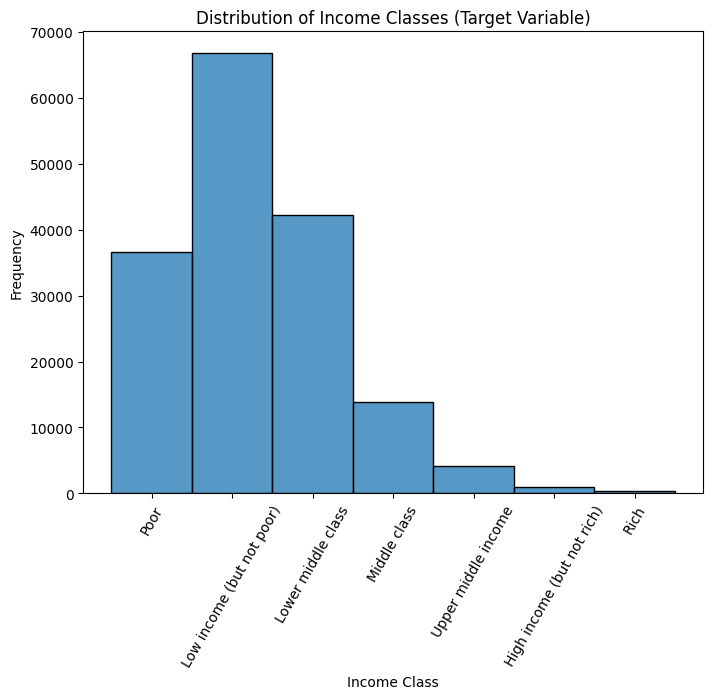

In [ ]:
labels = ['Poor', 'Low income (but not poor)', 'Lower middle class', 'Middle class', 'Upper middle income', 'High income (but not rich)', 'Rich']
plt.figure(figsize=(8, 6))
sns.histplot(final_df['income_classification'])
plt.title('Distribution of Income Classes (Target Variable)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=labels, rotation=60)
plt.xlabel('Income Class')
plt.ylabel('Frequency')
plt.show()

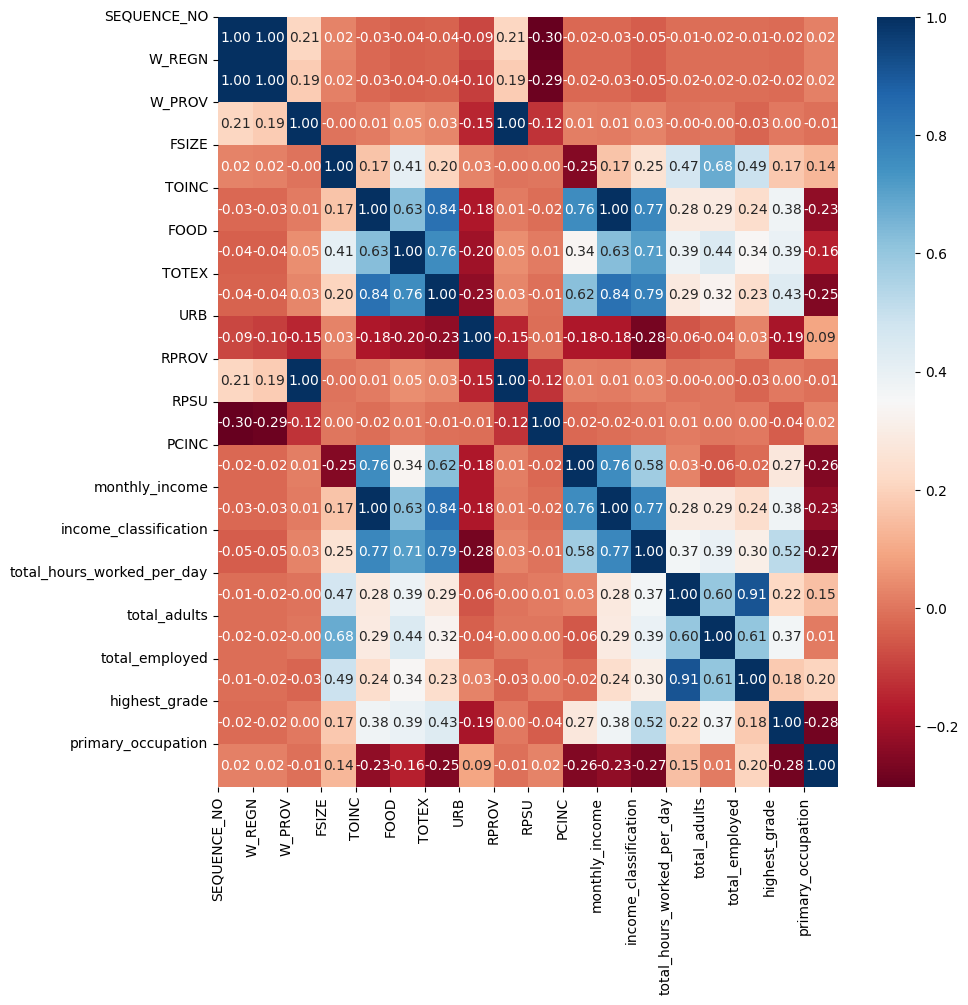

In [ ]:
corr = final_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### Model Implementation

In [ ]:
X = final_df.drop(["TOINC", "monthly_income", "income_classification"], axis=1)
y = final_df['income_classification']

In [ ]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
X_train.shape, y_train.shape


((115455, 15), (115455,))

In [ ]:
X_test.shape, y_test.shape

((49482, 15), (49482,))

In [ ]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec_gb = round(precision_score(y_test,y_pred_gb, average="weighted")*100,2)
rec_gb = round(recall_score(y_test,y_pred_gb, average="weighted")*100,2)
f1_gb = round(f1_score(y_test, y_pred_gb, average="weighted")*100, 2)

In [ ]:
y_train_pred_gb = gb_classifier.predict(X_train)

acc_gb_train = round(accuracy_score(y_train,y_train_pred_gb)*100,2)

acc_gb_train

92.7

In [ ]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [ ]:
prec_dt = round(precision_score(y_test,y_pred_dt, average="weighted")*100,2)
rec_dt= round(recall_score(y_test,y_pred_dt, average="weighted")*100,2)
f1_dt = round(f1_score(y_test, y_pred_dt, average="weighted")*100, 2)

In [ ]:
y_train_pred_dt = dt_classifier.predict(X_train)

acc_dt_train = round(accuracy_score(y_train,y_train_pred_dt)*100,2)

acc_dt_train

100.0

In [ ]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test)

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [ ]:
y_train_pred_knn = knn.predict(X_train)

acc_knn_train = round(accuracy_score(y_train,y_train_pred_knn)*100,2)

acc_knn_train

84.24

In [ ]:
prec_knn = round(precision_score(y_test,y_pred_knn, average="weighted")*100,2)
rec_knn= round(recall_score(y_test,y_pred_knn, average="weighted")*100,2)
f1_knn = round(f1_score(y_test, y_pred_knn, average="weighted")*100, 2)

In [ ]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [ ]:
prec_rf = round(precision_score(y_test,y_pred_rf, average="weighted")*100,2)
rec_rf= round(recall_score(y_test,y_pred_rf, average="weighted")*100,2)
f1_rf = round(f1_score(y_test, y_pred_rf, average="weighted")*100, 2)

In [ ]:
y_train_pred_rf = rf.predict(X_train)

acc_rf_train = round(accuracy_score(y_train,y_train_pred_rf)*100,2)

acc_rf_train

100.0

In [ ]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [ ]:
prec_gnb = round(precision_score(y_test,y_pred_gnb, average="weighted")*100,2)
rec_gnb = round(recall_score(y_test,y_pred_gnb, average="weighted")*100,2)
f1_gnb = round(f1_score(y_test, y_pred_gnb, average="weighted")*100, 2)

In [ ]:
y_train_pred_gnb = gnb.predict(X_train)

acc_gnb_train = round(accuracy_score(y_train,y_train_pred_gnb)*100,2)

acc_gnb_train

70.81

In [ ]:
#import libraries for SVM
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train,y_train)

#make predictions and store data for later
y_pred_ada = ada_boost.predict(X_test)

#get the accuracy score
acc_ada = round(accuracy_score(y_test,y_pred_ada)*100,2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
prec_ada = round(precision_score(y_test,y_pred_ada, average="weighted")*100,2)
rec_ada = round(recall_score(y_test,y_pred_ada, average="weighted")*100,2)
f1_ada = round(f1_score(y_test, y_pred_ada, average="weighted")*100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_train_pred_ada = ada_boost.predict(X_train)

acc_ada_train = round(accuracy_score(y_train,y_train_pred_ada)*100,2)

acc_ada_train

58.89

In [ ]:
#import libraries for SVM
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
bg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_bg = bg.predict(X_test)

#get the accuracy score
acc_bg = round(accuracy_score(y_test,y_pred_bg)*100,2)

In [ ]:
prec_bg = round(precision_score(y_test,y_pred_bg, average="weighted")*100,2)
rec_bg = round(recall_score(y_test,y_pred_bg, average="weighted")*100,2)
f1_bg = round(f1_score(y_test, y_pred_bg, average="weighted")*100, 2)

In [ ]:
y_train_pred_bg = bg.predict(X_train)

acc_bg_train = round(accuracy_score(y_train,y_train_pred_bg)*100,2)

acc_bg_train

99.96

In [ ]:
#import libraries for SVM
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_etc = etc.predict(X_test)

#get the accuracy score
acc_etc = round(accuracy_score(y_test,y_pred_etc)*100,2)

In [ ]:
prec_etc = round(precision_score(y_test,y_pred_etc, average="weighted")*100,2)
rec_etc = round(recall_score(y_test,y_pred_etc, average="weighted")*100,2)
f1_etc = round(f1_score(y_test, y_pred_etc, average="weighted")*100, 2)

In [ ]:
y_train_pred_etc = etc.predict(X_train)

acc_etc_train = round(accuracy_score(y_train,y_train_pred_etc)*100,2)

acc_etc_train

100.0

In [ ]:
#import libraries for SVM
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

#make predictions and store data for later
y_pred_hgb = hgb.predict(X_test)

#get the accuracy score
acc_hgb = round(accuracy_score(y_test,y_pred_hgb)*100,2)

In [ ]:
prec_hgb = round(precision_score(y_test,y_pred_hgb, average="weighted")*100,2)
rec_hgb = round(recall_score(y_test,y_pred_hgb, average="weighted")*100,2)
f1_hgb = round(f1_score(y_test, y_pred_hgb, average="weighted")*100, 2)

In [ ]:
y_train_pred_hgb = hgb.predict(X_train)

acc_hgb_train = round(accuracy_score(y_train,y_train_pred_hgb)*100,2)

acc_hgb_train

94.23

In [ ]:
#import libraries for SVM
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_mlpc = mlpc.predict(X_test)

#get the accuracy score
acc_mlpc = round(accuracy_score(y_test,y_pred_mlpc)*100,2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
prec_mlpc = round(precision_score(y_test,y_pred_mlpc, average="weighted")*100,2)
rec_mlpc = round(recall_score(y_test,y_pred_mlpc, average="weighted")*100,2)
f1_mlpc = round(f1_score(y_test, y_pred_mlpc, average="weighted")*100, 2)

In [ ]:
y_train_pred_mlpc = mlpc.predict(X_train)

acc_mlpc_train = round(accuracy_score(y_train,y_train_pred_mlpc)*100,2)

acc_mlpc_train

58.4

In [ ]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

#make predictions and store data for later
y_pred_bnb = bnb.predict(X_test)

#get the accuracy score
acc_bnb = round(accuracy_score(y_test,y_pred_bnb)*100,2)

In [ ]:
prec_bnb = round(precision_score(y_test,y_pred_bnb, average="weighted")*100,2)
rec_bnb = round(recall_score(y_test,y_pred_bnb, average="weighted")*100,2)
f1_bnb = round(f1_score(y_test, y_pred_bnb, average="weighted")*100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_train_pred_bnb = bnb.predict(X_train)

acc_bnb_train = round(accuracy_score(y_train,y_train_pred_bnb)*100,2)

acc_bnb_train

41.34

In [ ]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier()
ext.fit(X_train, y_train)

#make predictions and store data for later
y_pred_ext = ext.predict(X_test)

#get the accuracy score
acc_ext = round(accuracy_score(y_test,y_pred_ext)*100,2)

In [ ]:
prec_ext = round(precision_score(y_test,y_pred_ext, average="weighted")*100,2)
rec_ext = round(recall_score(y_test,y_pred_ext, average="weighted")*100,2)
f1_ext = round(f1_score(y_test, y_pred_ext, average="weighted")*100, 2)

In [ ]:
y_train_pred_ext = ext.predict(X_train)

acc_ext_train = round(accuracy_score(y_train,y_train_pred_ext)*100,2)

acc_ext_train

100.0

In [ ]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='uniform')
dc.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dc = dc.predict(X_test)

#get the accuracy score
acc_dc = round(accuracy_score(y_test,y_pred_dc)*100,2)

In [ ]:
y_train_pred_dc = dc.predict(X_train)

acc_dc_train = round(accuracy_score(y_train,y_train_pred_ext)*100,2)

acc_dc_train

100.0

In [ ]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors',
              'Random Forest', 'Naive Bayes', 'Ada Boost',
              'Bagging Classifier', 'Extra Trees', 'Hist Gradient Boosting',
              'MLPC Classifier', 'Bernoulli NB', 'Extra Tree Classifier', 'Dummy Classifier'],
    'Accuracy Score': [acc_gb, acc_dt, acc_knn,
              acc_rf, acc_gnb, acc_ada, acc_bg, acc_etc, acc_hgb, acc_mlpc, acc_bnb, acc_ext, acc_dc],
    "Precision Score": [prec_gb, prec_dt, prec_knn,
                        prec_rf, prec_gnb, prec_ada, prec_bg, prec_etc, prec_hgb, prec_mlpc, prec_bnb, prec_ext, prec_dc],
    "Recall Score": [rec_gb, rec_dt, rec_knn,
                        rec_rf, rec_gnb, rec_ada, rec_bg, rec_etc, rec_hgb, rec_mlpc, rec_bnb, rec_ext, rec_dc],
    "F1-Score": [f1_gb, f1_dt, f1_knn,
                        f1_rf, f1_gnb, f1_ada, f1_bg, f1_etc, f1_hgb, f1_mlpc, f1_bnb, f1_ext, f1_dc],
    'Training Accuracy Score': [acc_gb_train, acc_dt_train, acc_knn_train,
              acc_rf_train, acc_gnb_train, acc_ada_train, acc_bg_train, acc_etc_train, acc_hgb_train, acc_mlpc_train, acc_bnb_train, acc_ext_train, acc_dc_train],})
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,Training Accuracy Score
6,Bagging Classifier,99.38,99.38,99.38,99.38,99.96
1,Decision Tree,99.25,99.25,99.25,99.25,100.00
8,Hist Gradient Boosting,93.93,94.01,93.93,93.96,94.23
3,Random Forest,93.74,93.68,93.74,93.67,100.00
0,Gradient Boosting,92.26,92.22,92.26,92.21,92.70
7,Extra Trees,84.28,84.22,84.28,84.08,100.00
2,K Nearest Neighbors,72.75,72.55,72.75,72.62,84.24
4,Naive Bayes,71.29,71.04,71.29,70.98,70.81
11,Extra Tree Classifier,69.41,69.35,69.41,69.38,100.00
5,Ada Boost,58.76,45.93,58.76,50.91,58.89


In [ ]:
y_train_pred_dc = dc.predict(X_test)

acc_dc_train = round(accuracy_score(y_test,y_train_pred_dc)*100,2)

acc_dc_train

14.32

In [ ]:
prec_dc = round(precision_score(y_test,y_pred_dc, average="weighted")*100,2)
rec_dc = round(recall_score(y_test,y_pred_dc, average="weighted")*100,2)
f1_dc = round(f1_score(y_test, y_pred_dc, average="weighted")*100, 2)

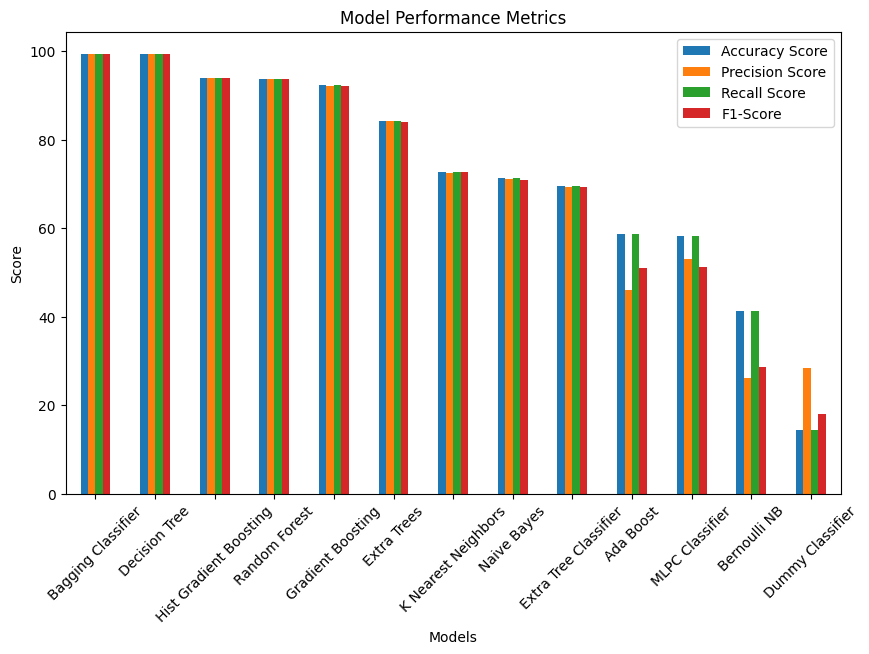

In [ ]:
import matplotlib.pyplot as plt

# Set the 'Models' column as the index
result_df.set_index('Model', inplace=True)

# Create the bar plot
result_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

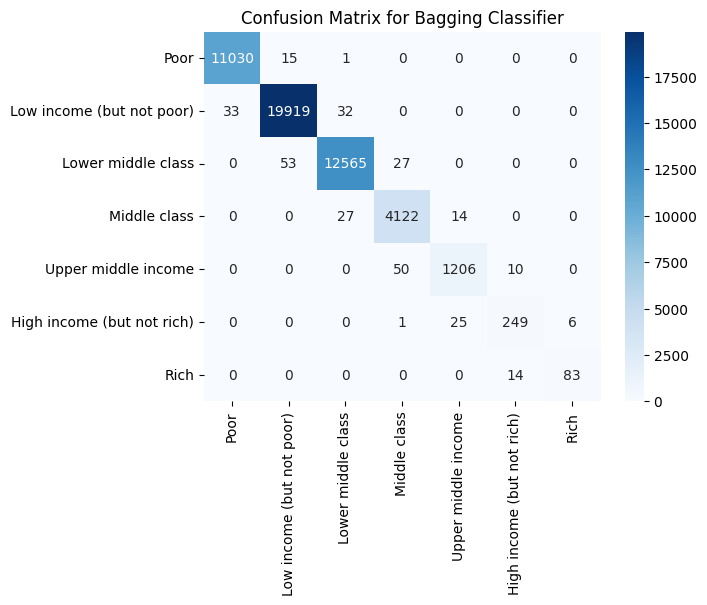

In [ ]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix for Bagging Classifier

cm = confusion_matrix(y_test, y_pred_bg)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

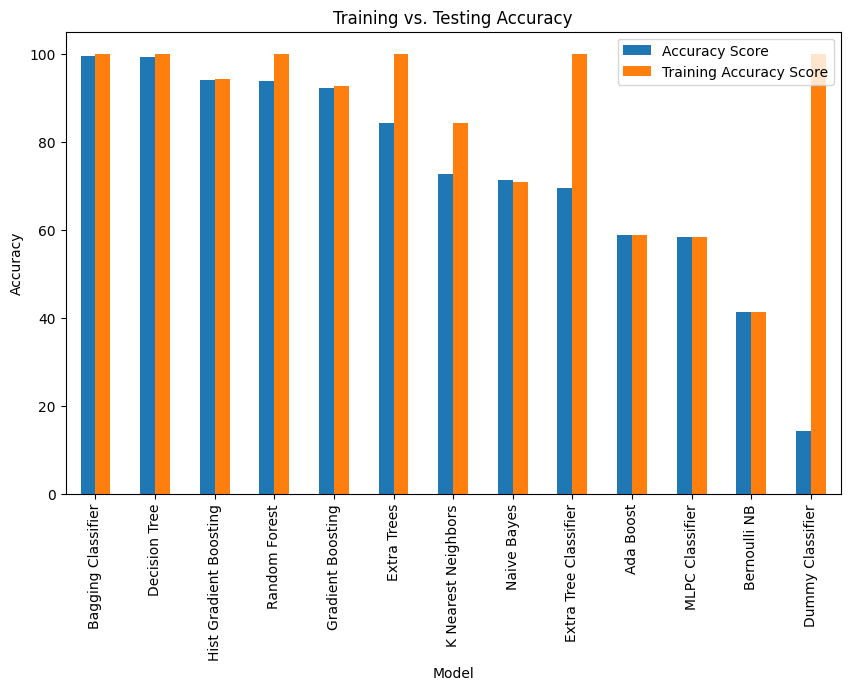

In [ ]:
train_vs_test_df = result_df[['Model', 'Accuracy Score', 'Training Accuracy Score']]

# Set the 'Model' column as the index
train_vs_test_df.set_index('Model', inplace=True)

# Create the bar plot
train_vs_test_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')

plt.show()